In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import statistics
from collections import Counter
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns





In [48]:
# Load the "drug.csv" dataset
data = pd.read_csv("./mobile_price_train.csv")
# Print information about the old dataset
print(data.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [49]:
# remove the rows that have missing values
def missingRemoved(data):
    data = data.dropna()
    return data

data = missingRemoved(data)

missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Check if there are any missing values in the entire dataset
if  missing_values.sum() == 0:
   print("\nNo missing values in the dataset.")
else:
   print("\nThere are missing values in the dataset.")

# print(data)


Missing Values:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No missing values in the dataset.


In [50]:
# # Initialize the scaler
# scaler = MinMaxScaler()

# # Fit and transform the data
# normalized_data = scaler.fit_transform(data)


In [114]:
# removed_column = ['price_range', 'sc_h', 'sc_w']
# y = normalized_data['price_range']



# X = normalized_data.drop(removed_column, axis=1)
removed_column = ['price_range', 'sc_h', 'wifi', 'n_cores', 'm_dep', 'four_g', 'mobile_wt', 'clock_speed', 'three_g', 'fc']
# Access the 'price_range' column from the original DataFrame 'data'
y = data['price_range']

# Convert the DataFrame 'data' to a NumPy array and drop columns
X_data = data.drop(removed_column, axis=1)
# print(X_data.head())
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data for X
X = scaler.fit_transform(X_data)

In [115]:
print(X[0])

[0.22778891 0.         0.         0.08064516 0.1        0.01020408
 0.17089453 0.61277392 0.38888889 0.94444444 0.        ]


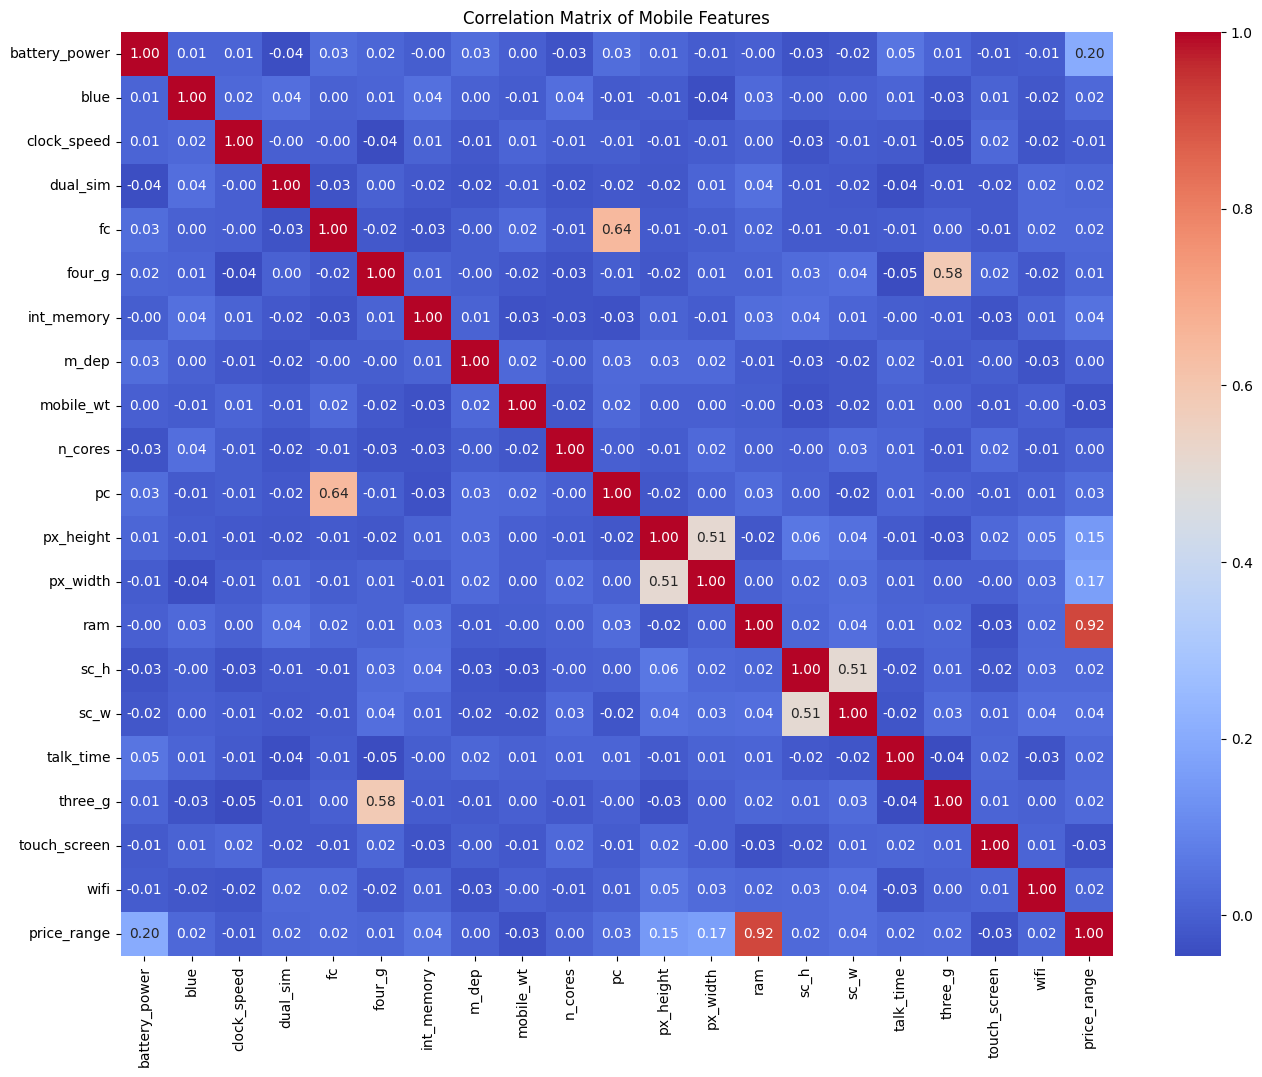

In [116]:
correlation_matrix = data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Mobile Features')
plt.show()

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [128]:
y_pred = model.predict(X_test)

In [129]:
accuracy = model.score(X_test,y_test)
print("Accuracy: ", accuracy*100)

Accuracy:  95.5
